# Project -  Detection of Bias in Movies Ratings Systems through Statistical Analysis 

**Background of the Problem**
In October 2015, a data journalist named Walt Hickey analyzed online movie ratings data and found strong evidence to suggest that [Fandango](https://www.fandango.com/), an online ratings aggregator, had a biased system which inflated ratings. He published his analysis in a Five Thirty Eight [article](https://fivethirtyeight.com/features/fandango-movies-ratings/).
Hickey contended that, Fandango's 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars. was tweaked towards inflation through rounding. Decimals in actual ratings were almost always rounded to the higher whole number or half star, as can be seen in the plot below, where the distributions are seen to be strongly negatively skewed.
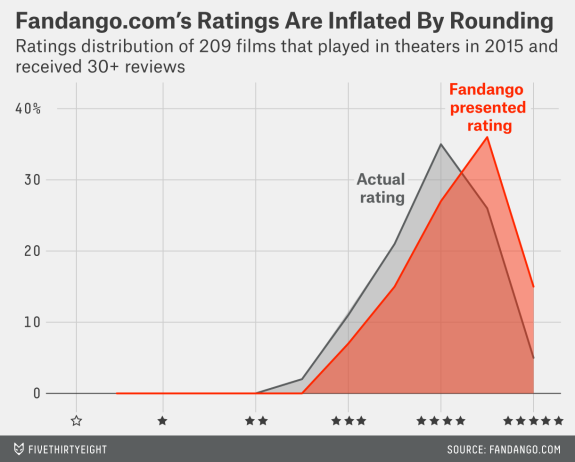
F
andango has since, claimed to have corrected, what it pronounced was a software glitch. 

**Aim of the Project**
In this project, we'll analyze both Hickey's dataset as well as a dataset compiled for 2016-17 movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Exploration of Datasets

**Walt Hickey's Dataset**
[Hickey's dataset]() is publicly available on github and details can be read in the [README.md file](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md). The data from Fandango was webscraped on 24 August 2015. The dataset available as a csv file `fandango_score_comparison.csv` contains every film that has ratings from other aggregators including Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

In [2]:
# Preliminary Exploration
hickey = pd.read_csv('fandango_score_comparison.csv')
print(hickey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

**Hickey Data Dictionary**
Below is a brief explanation of relevant columns in `hickey` dataset: 
- `FILM`:	The movie
- `Fandango_Stars`:	The number of stars the film had on its Fandango movie page
- `Fandango_Ratingvalue`:	The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
- `Fandango_votes`: The number of user votes the film had on Fandango
- `Fandango_Difference`:	The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue

Since, above variables are relevant to our present analysis, we will create a separate dataset comprising just these variables.

In [3]:
fandango = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
fandango_hickey = hickey[fandango]
print(fandango_hickey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   Fandango_Stars        146 non-null    float64
 2   Fandango_Ratingvalue  146 non-null    float64
 3   Fandango_votes        146 non-null    int64  
 4   Fandango_Difference   146 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB
None


In [4]:
print(fandango_hickey.head())

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  


**Alex's Dataset**: [Alex's dataset](https://github.com/mircealex/Movie_ratings_2016_17) for 2016-17 is also publicly available on github and details can be read in the [README.md file](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md). The dataset available as a csv file `movie_ratings_16_17.csv` contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017.  

In [5]:
# Preliminary Exploration
alex = pd.read_csv('movie_ratings_16_17.csv')
print(alex.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB
None


**Alex's Data Dictionary**
Below is a brief explanation of relevant columns in `alex` dataset: 
- `movie`:	the name of the movie
- `year`:	the release year of the movie
- `fandango`:	the Fandango rating of the movie (user score)

Since, above variables are relevant to our present analysis, we will create a separate dataset comprising just these variables.

In [6]:
fandango_new = ['movie', 'year', 'fandango']
fandango_alex = alex[fandango_new]
print(fandango_alex.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     214 non-null    object 
 1   year      214 non-null    int64  
 2   fandango  214 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB
None


In [7]:
print(fandango_alex.head())

                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0


## Sampling Criteria

**Walt Hickey's Sample**

Since we want to comparatively determine whether there has been any change in Fandango's rating system, we will have to look at the sampling criteria used for both datasets:
- Hickey's dataset contains 146 movies that have ratings from other aggregators including Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango.

- Hickey's repository contains another file `fandango_scrape.csv` which contains every film pulled from Fandango website that was in theaters on 24 August 2015.

In [8]:
hickey_all = pd.read_csv('fandango_scrape.csv')
print(hickey_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB
None


At the time of scraping i.e. 24 August 2015, Fandango's site listed 510 movies in theatre, of which Hickey initially selected 209 and later analyzed 146 based on whether the tickets were on sale or not.

Below we determine overall discrepance in the means of actual ratings and Fandango stars. We can see that the below mean discrepancies between actual and fandango stars does not seem as large as when seen more granularly.

In [9]:
# Compare all movies in theater with hickey's sample for average actual ratings (ratings on web)
print('Fandango actual mean :', hickey_all.RATING.mean())
print('hickey actual mean: ', fandango_hickey.Fandango_Ratingvalue.mean())

Fandango actual mean : 3.35176470588235
hickey actual mean:  3.8452054794520483


In [10]:
# Check all movies in theater for star ratings less than 3
print((hickey_all['STARS'] < 3).value_counts())

False    429
True      81
Name: STARS, dtype: int64


In [11]:
# Check all movies in theater for votes less than 30
print((hickey_all['VOTES'] < 30).value_counts())

True     298
False    212
Name: VOTES, dtype: int64


In [12]:
# Compare all movies in theater with hickey's sample for average star ratings 
print('Fandango stars mean :', hickey_all.STARS.mean())
print('hickey fandango stars mean:', fandango_hickey.Fandango_Stars.mean())

Fandango stars mean : 3.5323529411764705
hickey fandango stars mean: 4.089041095890411


In [13]:
# Check hickey's sample for minimum number of stars 
print((fandango_hickey['Fandango_Stars'] < 3).value_counts())

False    146
Name: Fandango_Stars, dtype: int64


In [14]:
# Check hickey's sample for minimum number of vote counts
print((fandango_hickey['Fandango_votes'] < 30).value_counts())

False    146
Name: Fandango_votes, dtype: int64


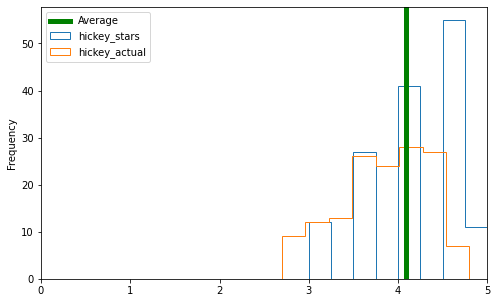

In [15]:
# Plot histograms of Hickey's sample for actual (on the web) and star ratings
fig = plt.figure(figsize=(8, 5))
fandango_hickey.Fandango_Stars.plot.hist(label = 'hickey_stars', legend = True , bins = 8, histtype = 'step')
fandango_hickey.Fandango_Ratingvalue.plot.hist(label = 'hickey_actual', legend = True , bins = 8, histtype = 'step')
plt.axvline(x = fandango_hickey.Fandango_Stars.mean(), ymin = 0, ymax = 1, label = 'Average', linewidth = 5, color = 'green')
plt.legend()
plt.xlim(0,5)
plt.show()


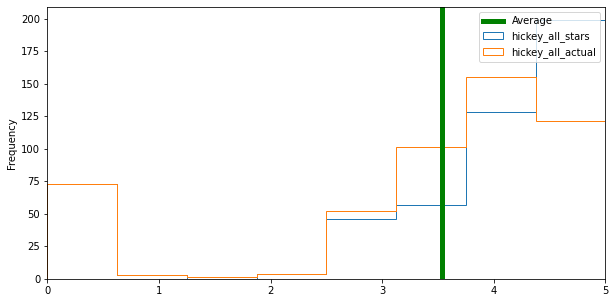

In [16]:
# Plot histograms of all movies in theater for actual (on the web) and star ratings
fig = plt.figure(figsize=(10, 5))
hickey_all.STARS.plot.hist(label = 'hickey_all_stars', legend = True , bins = 8, histtype = 'step')
hickey_all.RATING.plot.hist(label = 'hickey_all_actual', legend = True , bins = 8, histtype = 'step')
plt.axvline(x = hickey_all.STARS.mean(), ymin = 0, ymax = 1, label = 'Average', linewidth = 5, color = 'green')
plt.legend()
plt.xlim(0,5)
plt.show()

### A Critique of Walt Hickey's Sampling Methodology

- Hickey pulled the data for 510 films on Fandango.com that had tickets on sale in 2015. That data is contained in `fandango_scrape.csv` analyzed above: ["I pulled the data for 510 films on Fandango.com that had tickets on sale this year"](https://fivethirtyeight.com/features/fandango-movies-ratings/). **So this sample is not representative of the Fandango rating methodology, it is only relevant to the movies which were in theaters in August 2015.** At best it can be a critique of rating mechanism for movies which are in theaters.

- ["Of the 437 films with at least one review, 98 percent had a 3-star rating or higher and 75 percent had a 4-star rating or higher."](https://fivethirtyeight.com/features/fandango-movies-ratings/). **This statement is correct but not significant. Since the movies were in theater, their ratings were in transition. Moreover, 298 movies out of 510 had less than 30 votes and 81 movies (about 20%) out of 510 had a rating of below 3 stars, infact as shown in histograms above approximately 75 had a rating of below 1.**

- As shown above, the average star rating of 510 movies in theaters is quite low i.e. 3.53 as compared to Hickey's sample of 146 for which it is 4.08. **It could be because of 75 outliers between 0 and 1, but it should be kept in mind that the movies were still in theaters and rating were liable to change.**

- As shown in above histograms, Hickey has selected 146 movies with a star rating of 2.5 and above where the difference with actual ratings (on the web) is exaggerated. **However, if we plot histogram of all 510 movies' star ratings with respect to actual ratings (on the web) the exaggeration is reduced significantly and is only manifested after 4.0 stars or greater**

---
>>
So for all intents and purposes, though Walt Hickey has pointed to a trend, he has only analyzed movies with high ratings and high votings. And though, Fandango's histograms are negatively skewed, his dataset is still not a fair sample for reaching a conclusion regarding bias in Fandango's movie rating system, as it clearly skews them further left (stacks clusters to the right).
A representative sample would, at the minimum, include proportional entries from movies which are not in theater and for which there have not been too many votes.
>>

**Alex's Sample: **

Alex Olteanu, a data scientist's, dataset is aimed at comparing **popular** movies from 2016 to March 2017 among various aggregators with a view to predict which distributin is closest to normal, as he explains in his [blog article](https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/), and as such does not contain the **rounding difference** between actual and star ratings of Fandango. So, it cannot be used for predicting whether there has been any change in Fandango's system of movie ratings. 
Also, like Hickey's, it only pertains to  movies in the theater and focuses on popular movies i.e. with higher votings (though votes baseline is not indicated). 

**However, one significant observation can be made, from the histograms below:** 

---
>
The shape of the curves is remarkably similar. However, as compared to hickey's sample, alex's sample registers a downward trend in fandango ratings, which may or may not be indicative of an attempt at correction in the system, as alex's sample is also not representative.

>

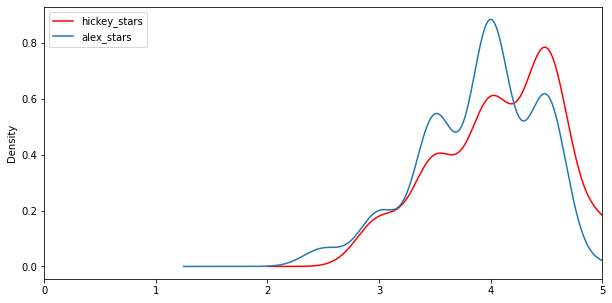

In [17]:
fig = plt.figure(figsize=(10, 5))
fandango_hickey.Fandango_Stars.plot.kde(label = 'hickey_stars', legend = True, color = 'red' )
fandango_alex.fandango.plot.kde(label = 'alex_stars', legend = True )
plt.xlim(0,5)
plt.show()

## Changing the Goal Post

Although, it is not possible to comment on overall system of ratings at Fandango with these sample datasets. But given the similarity of sampling conditions, with these two samples, we can still compare the trend of Fandango's movie ratings for popular (with high votes) movies in theater in a particular sampling year of release.

- Fandango's ratings for popular movies released in 2015
- Fandango's ratings for popular movies released in 2016

**Determining Popularity**

As we have shown above, Hickey's dataset contains the information regarding number of votes (or popularity). We set a measure of popularity based on his benchmark i.e. 30 votes.

In [18]:
# Check hickey's sample for minimum number of vote counts
print((fandango_hickey['Fandango_votes'] > 30).value_counts())

True    146
Name: Fandango_votes, dtype: int64


In case of Alex's dataset, though, popularity information is not available. So, we will have to draw a random sample and cross check from [Fandango's site](https://www.fandango.com/), the number of votes for the movies sampled. 

In [19]:
alex_sample = pd.DataFrame(fandango_alex.sample(n = 10, random_state = 3))
votes = [9720, 8846, 0, 25623, 14056, 3809, 25237, 4081, 54340, 22140]
alex_sample["votes"] = votes
print(alex_sample)

                          movie  year  fandango  votes
146                   Sleepless  2017       4.0   9720
25               Bleed for This  2016       4.0   8846
163                    The Boss  2016       3.5      0
108      Mechanic: Resurrection  2016       4.0  25623
83               Jane Got a Gun  2016       3.5  14056
197     The Take (Bastille Day)  2016       4.0   3809
211  xXx: Return of Xander Cage  2017       4.0  25237
77      In a Valley of Violence  2016       4.0   4081
34         Central Intelligence  2016       4.5  54340
203      Underworld: Blood Wars  2016       4.0  22140


**Fandango has switched over to Rotten Tomatoes "TOMATOMETER"**
Though Fandango has switched over to Rotten Tomatoes "TOMATOMETER" for displaying ratings, it can be seen that all the movies in our sample are popular movies except that the data for **The Boss** is not available on Rotten Tomatoes.

**Year of Release**

Alex's dataset contains a column for year of release. Hickey's dataset contains year of release information in the `FiLM` column, so we can create a new column `year` by extracting the string.

In [20]:
fandango_hickey['year'] = fandango_hickey['FILM'].str[-5:-1]
print(fandango_hickey.head())

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  year  
0           14846                  0.5  2015  
1           12640                  0.5  2015  
2           12055                  0.5  2015  
3            1793                  0.5  2015  
4            1021                  0.5  2015  


<ipython-input-20-7c19d80847a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_hickey['year'] = fandango_hickey['FILM'].str[-5:-1]


**Isolating datasets by Year of Release**
Now, we can isolate the datasets by year of release to contain only movies released in 2015 and 2016

In [21]:
hickey_2015 = fandango_hickey[fandango_hickey['year']=='2015']
alex_2016 = fandango_alex[fandango_alex['year']== 2016]

print(hickey_2015['year'].value_counts())
print(alex_2016['year'].value_counts())


2015    129
Name: year, dtype: int64
2016    191
Name: year, dtype: int64


### Comparing Distributions
We will now compare the distributions `hickey_2016` and `alex_2016` by plotting their Kernel Density Estimate (KDE) plots. We already plotted the KDE plots for the entire datasets above, but here we will compare just the popular movies released in 2015 and 2016.

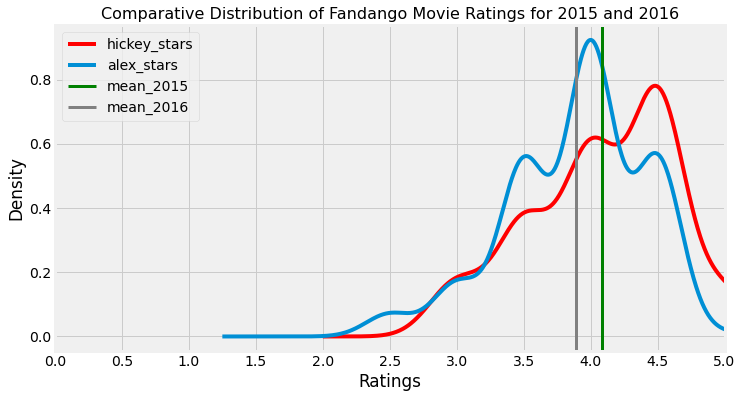

In [22]:
fig = plt.figure(figsize=(12, 6))
from numpy import arange
plt.style.use('fivethirtyeight')
hickey_2015.Fandango_Stars.plot.kde(label = 'hickey_stars', legend = True, color = 'red', xticks = arange(0, 5.5, 0.5)  )
alex_2016.fandango.plot.kde(label = 'alex_stars', legend = True )
plt.axvline(x = hickey_2015.Fandango_Stars.mean(), ymin = 0, ymax = 1, label = 'mean_2015', linewidth = 3, color = 'green')
plt.axvline(x = alex_2016.fandango.mean(), ymin = 0, ymax = 1, label = 'mean_2016', linewidth = 3, color = 'grey')
plt.xlim(0,5)
plt.legend()
plt.xlabel('Ratings')
plt.title("Comparative Distribution of Fandango Movie Ratings for 2015 and 2016", fontsize = 16)
plt.show()

**Analysis:**

- Both distributions above, like earlier, are strongly negatively skewed (values stacked to the right or positive side of the plot). 
- Both distributions above are strikingly similar in shape though for movies released in 2016, the plot has shifted approximately 0.5 star ratings to the left, which indicates that the **ratings have been downward revised by a nearly constant factor**
- Vertical lines in above plot indicate means for respective distributions. The mean has shifted by 0.2 to 0.25 stars to the left.

In [23]:
print('2015_mean: ', hickey_2015.Fandango_Stars.mean())
print('2016_mean: ', alex_2016.fandango.mean())      

2015_mean:  4.0852713178294575
2016_mean:  3.887434554973822


### Comparing Relative Frequencies
- We will now compare the frequency tables for two data sets for more granular information regarding where the changes in the distributions have actually taken place, though the KDE plot above indicates that changes have mostly taken place towards the higher ratings side (right side or right of the means) of the plot.
- Since, there is a difference in numbers of movies included in each dataset, we will use normalized frequencies for each dataset.

In [24]:
# Generate the two frequency tables

print('2015 Frequency Table: ', '\n', hickey_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100)
print('\n', '2016 Frequency Table: ', '\n', alex_2016['fandango'].value_counts(normalize = True).sort_index() * 100)


2015 Frequency Table:  
 3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

 2016 Frequency Table:  
 2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


**Analysis**

It can be seen that:
- 2016 ratings for popular movies have been downward revised as compared to 2015, starting at 2.5 instead of 3 in 2016.
- Highest ratings i.e. '4.5' and '5.0' have also been downward revised
- Rating of '4.0' has been upward revised to compensate for downward revisions above this rating.

**Due to these revisions, an impression has been generated that a conscious attempt at moderately downward revision has been made whereas the overall trends remain the same (shape of the plot).** 

### Determining Direction of Change

- We have calculated the mean and seen the downward revision. We can also see that the rating of '4.0' has changed maximum to compensate for downward revisions above this rating while keeping the mean close to '4.0'.
- We will now calculate other metrics such as median and mode to further see the direction of change. 

In [25]:
# Create a dataframe containing mean, median and mode values
mean_2015 = hickey_2015['Fandango_Stars'].mean()
mean_2016 = alex_2016['fandango'].mean()

median_2015 = hickey_2015['Fandango_Stars'].median()
median_2016 = alex_2016['fandango'].median()

mode_2015 = hickey_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = alex_2016['fandango'].mode()[0]

metrics = pd.DataFrame({2015: [mean_2015, median_2015, mode_2015], 2016: [mean_2016, median_2016, mode_2016]}, index = ['mean', 'median', 'mode'])
print(metrics.info())
print(metrics)


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, mean to mode
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2015    3 non-null      float64
 1   2016    3 non-null      float64
dtypes: float64(2)
memory usage: 72.0+ bytes
None
            2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000


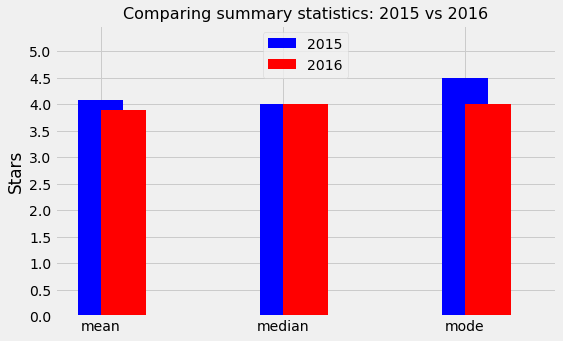

In [26]:
# Plot a grouped bar chart
fig = plt.figure(figsize=(8, 5))
plt.style.use('fivethirtyeight')
metrics[2015].plot.bar(colormap = 'winter', align = 'center', label = '2015', width = .25)
metrics[2016].plot.bar(colormap = 'autumn', align = 'edge', label = '2016', width = .25, rot = 0)
                         

plt.title('Comparing summary statistics: 2015 vs 2016', fontsize = 16)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.5,.5))
plt.ylabel('Stars')
plt.legend(loc = 'upper center')
plt.show()

## Conclusion

While the `mean` has reduced from 2015 to 2016. An interesting thing to note is that the `mode` has also shifted from 4.5 to 4.0, while the `median` remains the same at 4.0.

**Above confirms our earlier observation that the ratings have been fixed just enough by focusing on a rating of 4.0 while reducing higher ratings of 4.5 and 5.0, probably to ward off criticism in the wake of Walt Hickey's article.** 